# 1. Introduction

##Problem Statement

As a Senior Data Scientist, I am addressing the critical challenge of late-stage detection of cardiovascular diseases a leading cause of death worldwide. Early identification is essential, but often hindered by limited resources and the subtle onset of symptoms. This delay not only increases patient mortality but also places a significant burden on healthcare systems and escalates treatment costs.

To solve this, I am leading the development of a scalable, data-driven machine learning model that utilizes routine patient check-up data to predict the likelihood of heart disease. This solution will help prioritize high-risk individuals for timely diagnostic evaluation, improving clinical outcomes and optimizing healthcare efficiency.
## Why It Matters
A successful implementation of this model could:

- Enable early intervention and reduce hospitalization rates  
- Optimize doctor-patient resource allocation  
- Provide actionable insights from electronic health records  
- Help insurance companies assess health risk profiles more accurately

## Data-Driven Approach
To tackle this, we formulate the task as a binary classification problem, where the objective is to predict whether a patient is likely to be diagnosed with heart disease (1) or not (0), based on their clinical attributes.



# Importing necessary libraries

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score


- `pandas`, `numpy`: Handle data and perform numerical operations  
- `matplotlib.pyplot`, `seaborn`: Create plots for data exploration and evaluation  
- `StandardScaler`, `OneHotEncoder`: Scale numeric features, encode categorical ones  
- `ColumnTransformer`: Apply preprocessing to specific columns  
- `train_test_split`: Split dataset into training and testing parts  
- `Sequential`, `Dense`: Define a neural network with Keras  
- `EarlyStopping`: Stop training early if validation loss doesn't improve  
- `load_model`: Reload a saved trained model  
- `classification_report`, `confusion_matrix`, `roc_auc_score`, etc.: Evaluate performance with metrics like accuracy, precision, recall, F1, and ROC


  ## Let us first load

In [77]:
heart_data_set = pd.read_csv("/content/heart (2).csv")
heart_data_set.head(9)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


The dataset includes 13 attributes related to heart health. The goal is to predict whether a person has heart disease (`condition = 1`) or not (`condition = 0`).

#### Features:
- **age**: Age in years  
- **sex**: Sex (1 = male, 0 = female)  
- **cp**: Chest pain type  
  - 0 = typical angina  
  - 1 = atypical angina  
  - 2 = non-anginal pain  
  - 3 = asymptomatic  
- **trestbps**: Resting blood pressure (mm Hg)  
- **chol**: Serum cholesterol (mg/dl)  
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)  
- **restecg**: Resting ECG results  
  - 0 = normal  
  - 1 = ST-T wave abnormality  
  - 2 = probable/definite left ventricular hypertrophy  
- **thalach**: Maximum heart rate achieved  
- **exang**: Exercise-induced angina (1 = yes, 0 = no)  
- **oldpeak**: ST depression induced by exercise  
- **slope**: Slope of peak exercise ST segment  
  - 0 = upsloping  
  - 1 = flat  
  - 2 = downsloping  
- **ca**: Number of major vessels (0–3) colored by fluoroscopy  
- **thal**:  
  - 0 = normal  
  - 1 = fixed defect  
  - 2 = reversible defect  

#### Target:
- **condition**:  
  - 0 = no heart disease  
  - 1 = presence of heart disease  


#2. Data exploration

  ## Let us explore the data.
  Check percentage of missing values in each column and data is not missing

In [78]:
heart_data_set.isnull().sum() / len(heart_data_set) * 100

,0
age,0.0
sex,0.0
cp,0.0
trestbps,0.0
chol,0.0
fbs,0.0
restecg,0.0
thalach,0.0
exang,0.0
oldpeak,0.0


Below we will Check data types of all columns

In [79]:
heart_data_set.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


and then taking the numeric columns

In [80]:
for i, col in enumerate(heart_data_set.select_dtypes(include=['number']).columns):
    print(i,col)

0 age
1 sex
2 cp
3 trestbps
4 chol
5 fbs
6 restecg
7 thalach
8 exang
9 oldpeak
10 slope
11 ca
12 thal
13 target


checking the destribution of the dataset and target Variable Distribution (Proportion)

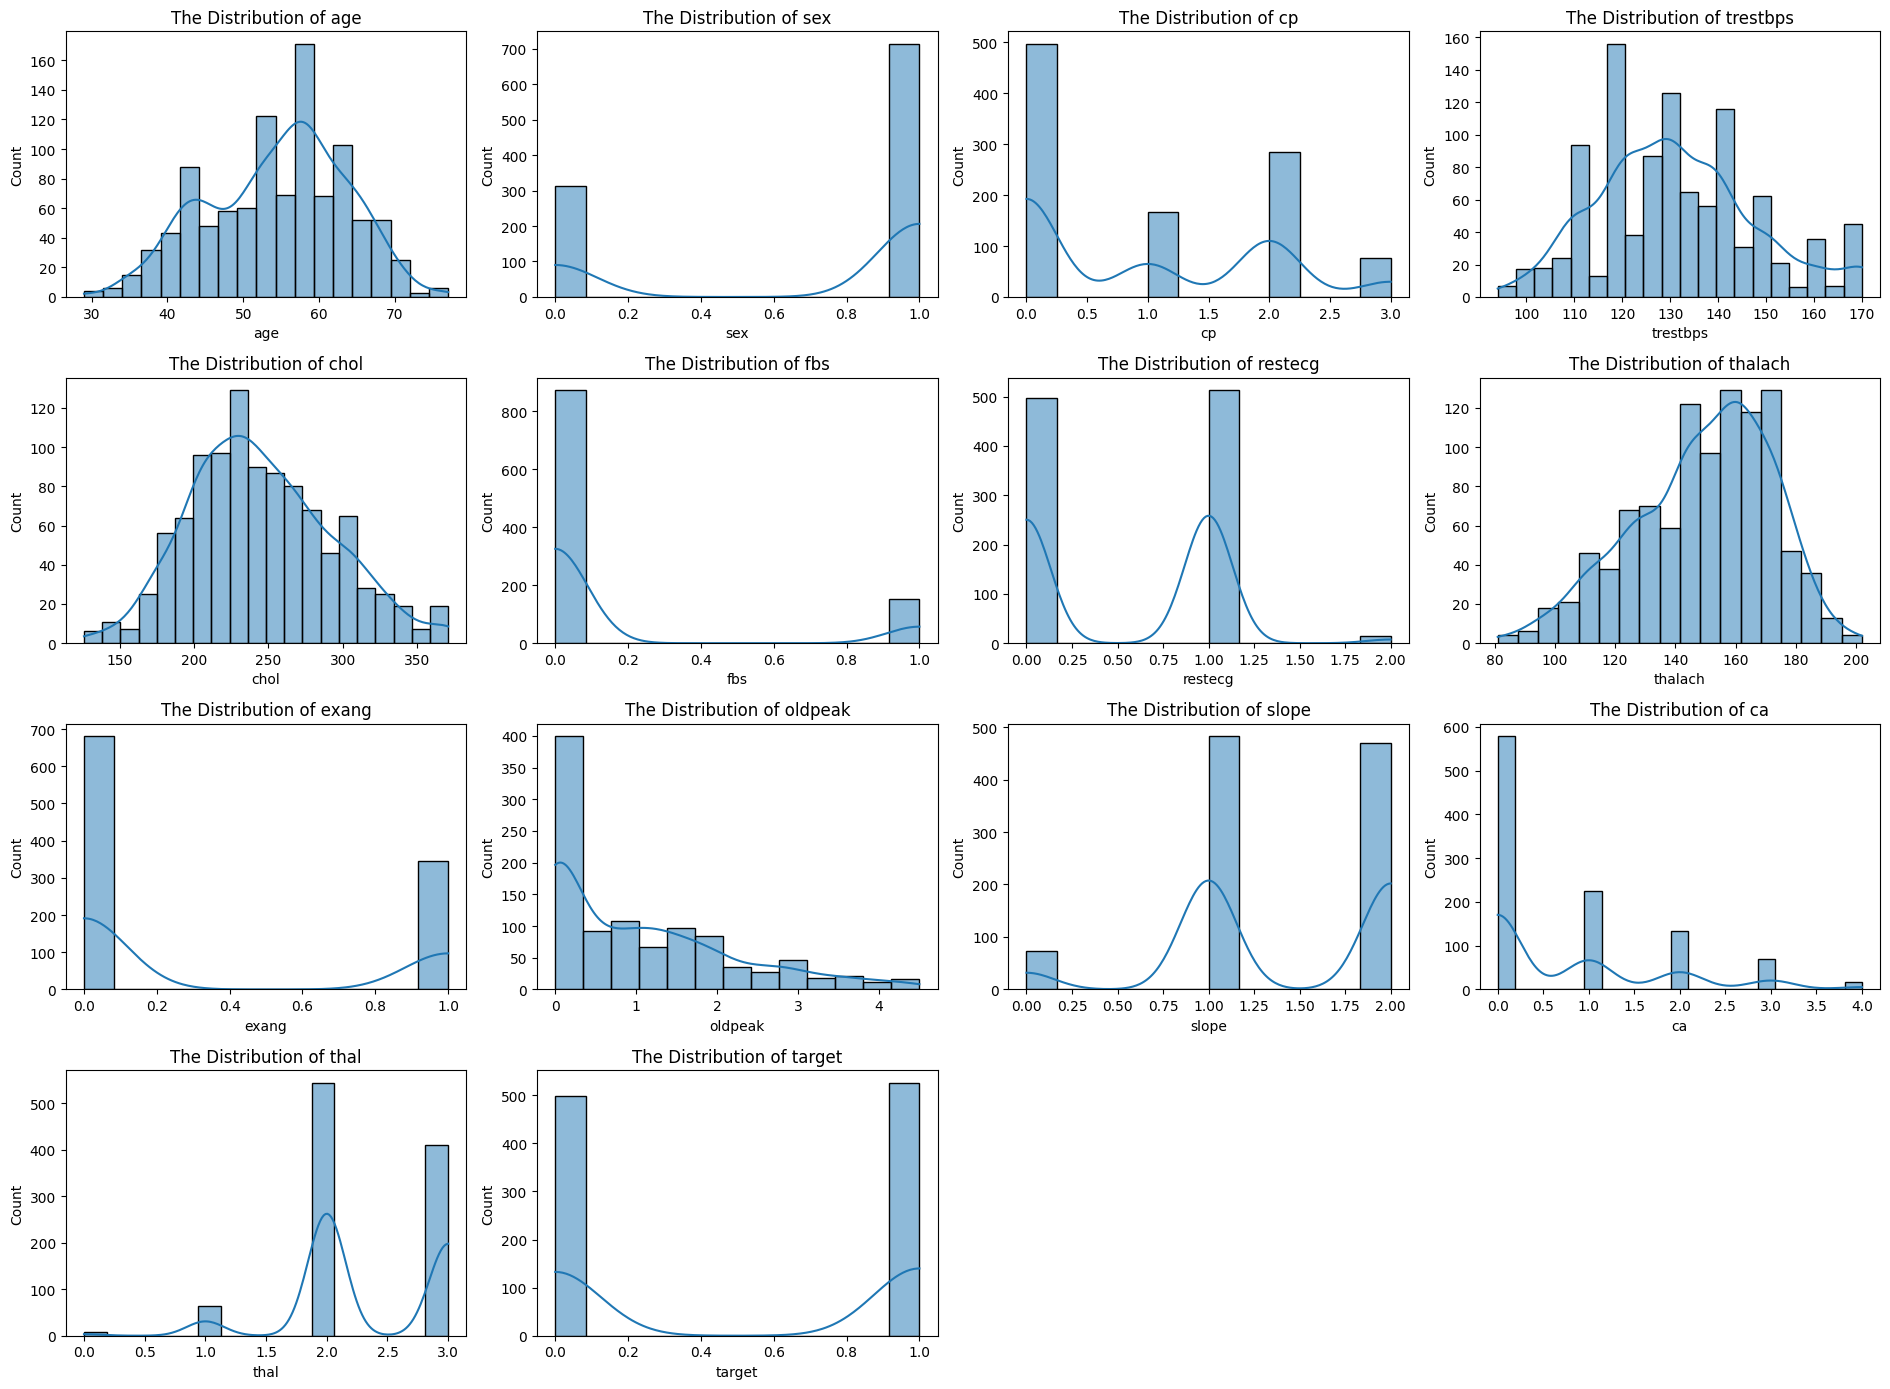

Target variable distribution (Proportion):
target
1    0.513171
0    0.486829
Name: proportion, dtype: float64


In [104]:
plt.figure(figsize=(19, 14))

for i, col in enumerate(heart_data_set.select_dtypes(include=['number']).columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(heart_data_set[col], kde=True)
    plt.title(f'The Distribution of {col}')

plt.tight_layout()
plt.show()


for col in heart_data_set.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'The Distribution of {col}')
    plt.show()


print("Target variable distribution (Proportion):")
print(heart_data_set['target'].value_counts(normalize=True))


The dataset is fairly balanced, with a slight majority of positive cases (patients diagnosed with heart disease).


# Correlation Analysis

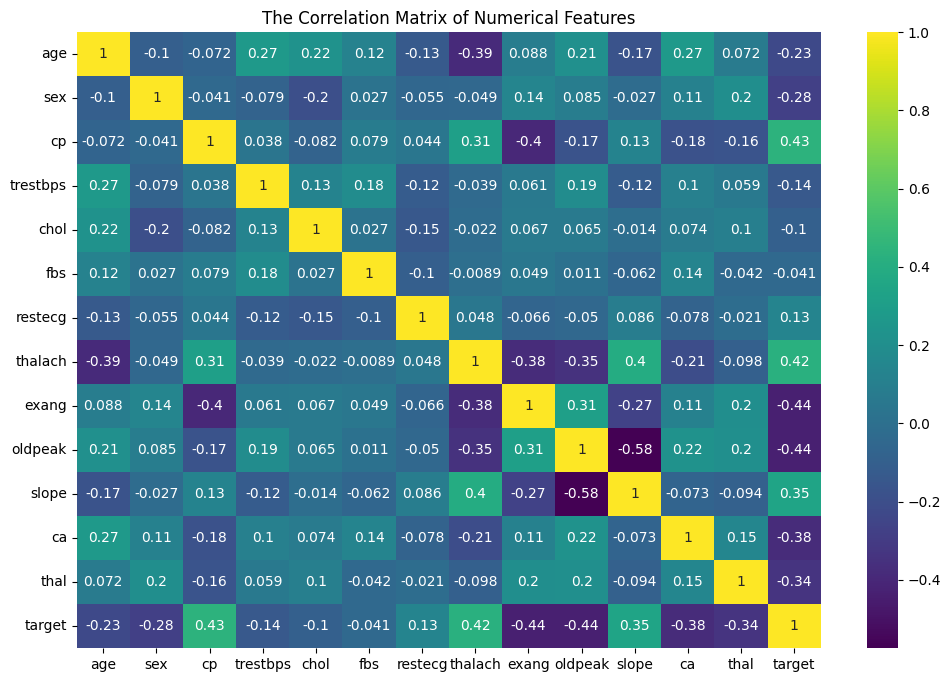

In [82]:
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data_set.corr(), annot=True, cmap='viridis')
plt.title('The correlation matrix of numerical features')
plt.show()

In [83]:
#explain corelation between categorical feature and target variables

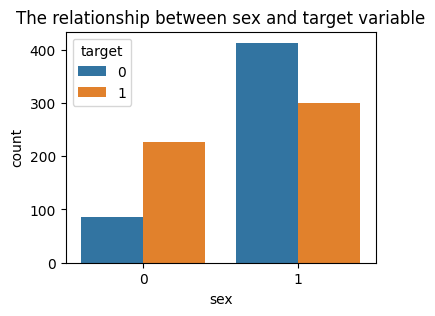

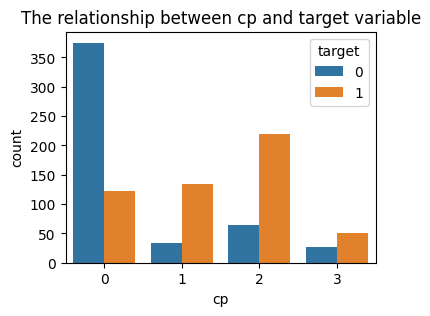

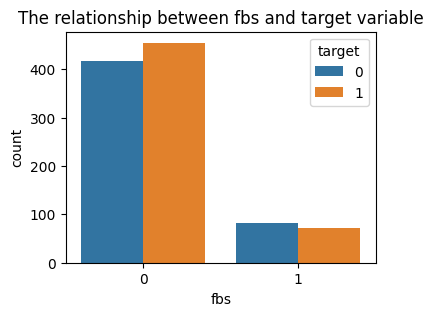

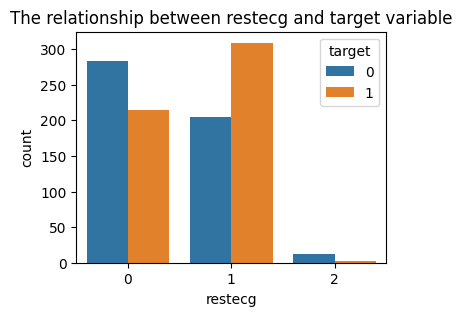

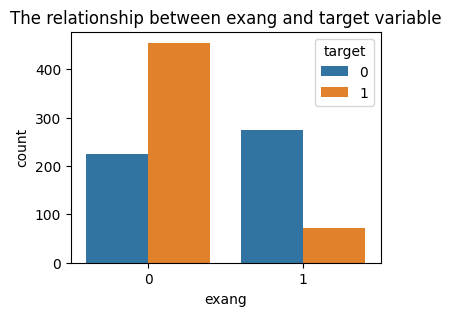

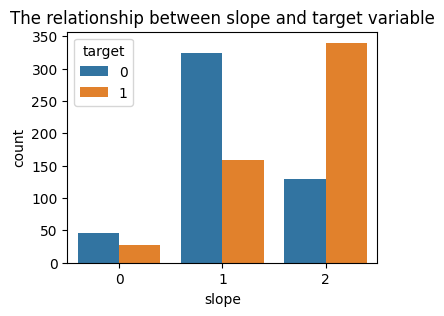

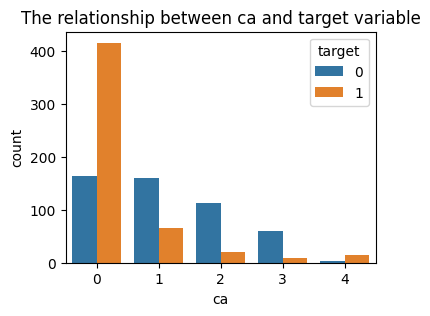

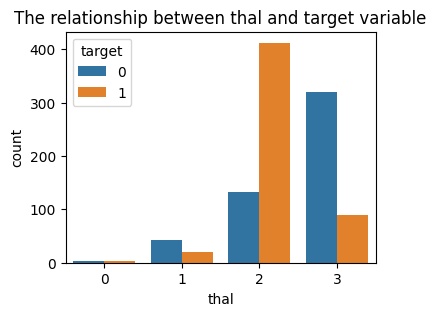

In [84]:
for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=col, hue='target', data=heart_data_set)
    plt.title(f'The relationship between {col} and target variable')
    plt.show()

We use horizontal boxplots for all numerical features to visually inspect outliers across multiple columns simultaneously. Boxplots highlight the median, quartiles, and potential outliers beyond the whiskers.

This helps identify which features may need special handling during data cleaning or feature engineering.


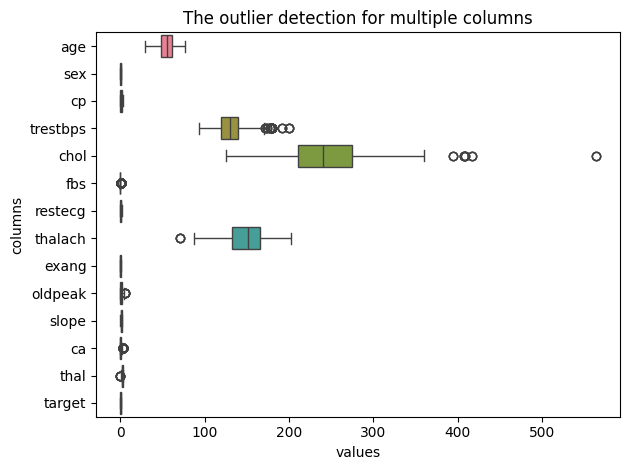

In [85]:
numeric_columns = heart_data_set.select_dtypes(include='number').columns

sns.boxplot(data=heart_data_set[numeric_columns], orient='h')

plt.title('The outlier detection for multiple columns')
plt.xlabel('values')
plt.ylabel('columns')
plt.tight_layout()
plt.show()

# Note :
As per the research, we found that Chol > 500 is abnormal. We usually should not modify the health report, as there are multiple reasons for high levels:

there might be a rare genetic disorder (e.g., familial hypercholesterolaemia).

That is why we are not removing that.

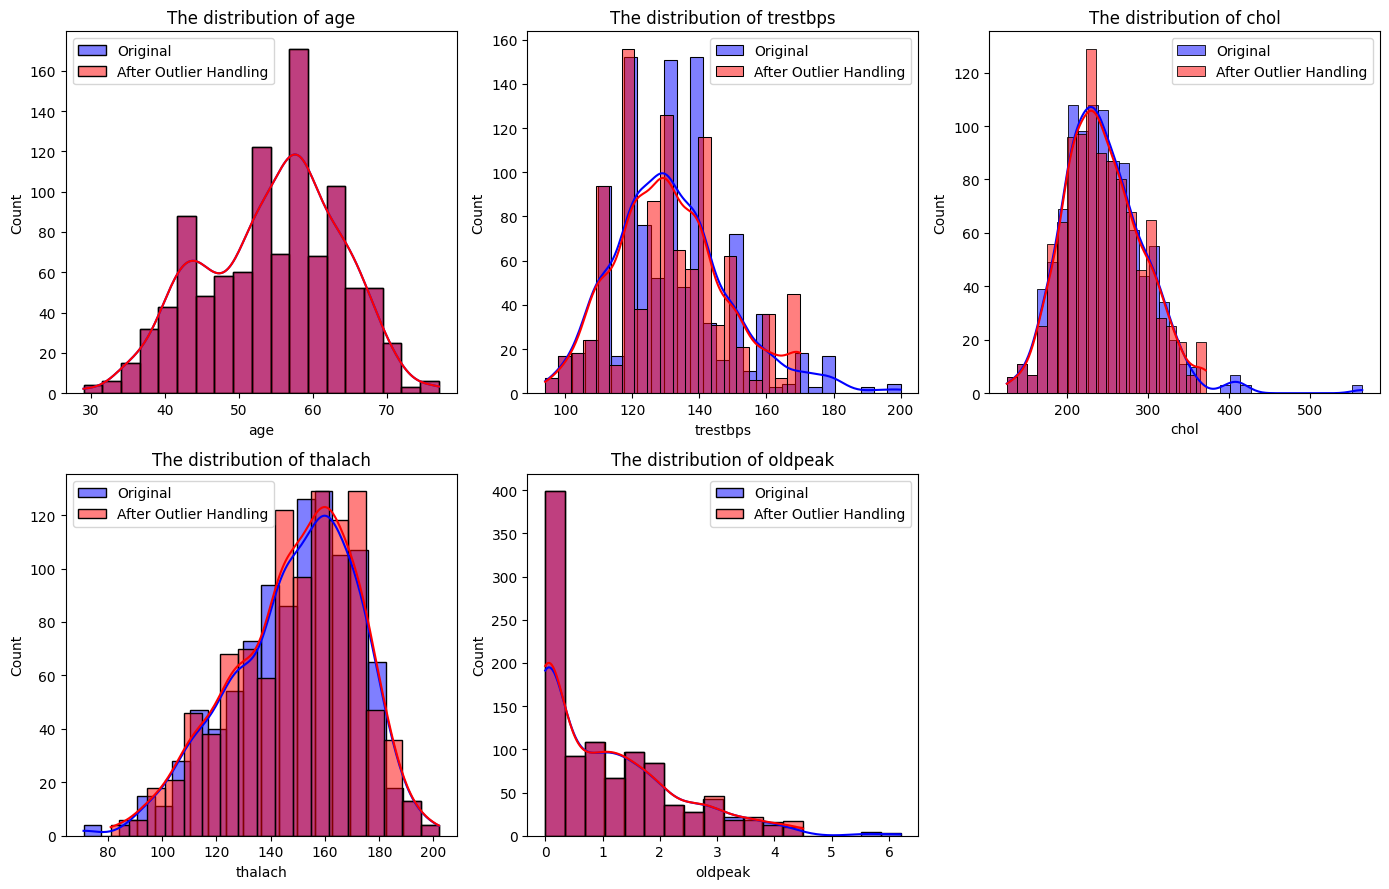

In [86]:
Numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(14, 9))

for i, col in enumerate(Numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(heart_data_set[col], kde=True, color='blue', label='Original')

    Q1 = heart_data_set[col].quantile(0.25)
    Q3 = heart_data_set[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    heart_data_set[col] = heart_data_set[col].clip(lower=lower_bound, upper=upper_bound)

    sns.histplot(heart_data_set[col], kde=True, color='red', label='After Outlier Handling')
    plt.title(f'The distribution of {col}')
    plt.legend()

plt.tight_layout()
plt.show()

###Outlier Handling for Numerical Features

Since there are no missing values, no imputation is needed.

For numerical features (`age`, `trestbps`, `chol`, `thalach`, `oldpeak`), we apply the Interquartile Range (IQR) rule to detect and cap outliers. Values beyond 1.5 * IQR below Q1 or above Q3 are clipped to the respective boundary to reduce their influence on the model.

The following plots show the distributions before (blue) and after (red) outlier handling.


#3. Data preparation

 Prepare the data for model training by encoding categorical features and scaling numerical features.

 Reasoning: Prepare the data for model training by encoding categorical features and scaling numerical features.

In [87]:
# Identify categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

We separate the features into:

- **Categorical Features:**  
  `sex`, `cp` (chest pain type), `fbs` (fasting blood sugar), `restecg` (resting ECG results), `exang` (exercise induced angina), `slope` (peak exercise ST segment slope), `ca` (number of major vessels colored by fluoroscopy), and `thal` (thalassemia).

- **Numerical Features:**  
  `age`, `trestbps` (resting blood pressure), `chol` (serum cholesterol), `thalach` (maximum heart rate achieved), `oldpeak` (ST depression induced by exercise).


In [88]:
Numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Numeric_transformer, Numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

prepared_data_f = preprocessor.fit_transform(heart_data_set.drop('target', axis=1))
prepared_data_f

array([[-0.26843658, -0.37886916, -0.69110401, ...,  0.        ,
         0.        ,  1.        ],
       [-0.15815703,  0.52889356, -0.87969285, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.71659547,  0.83148113, -1.48736802, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.81983438, -1.28663188,  0.6290179 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.4889957 , -1.28663188,  0.18897727, ...,  0.        ,
         1.        ,  0.        ],
       [-0.04787747, -0.68145673, -1.1940076 , ...,  0.        ,
         0.        ,  1.        ]])

We apply different transformations to numerical and categorical features using `ColumnTransformer`:

- **Numerical features** are standardized using `StandardScaler` to have zero mean and unit variance.  
- **Categorical features** are one-hot encoded to convert categories into binary indicator variables, ignoring unknown categories during transformation.

The transformed features are combined into a single processed dataset ready for model training.


In [89]:
feature_names = Numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
prepared_data_f = pd.DataFrame(prepared_data_f, columns=feature_names)
prepared_data_f['target'] = heart_data_set['target']

prepared_data_f.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
0,-0.268437,-0.378869,-0.691104,0.824084,-0.054537,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,-0.158157,0.528894,-0.879693,0.255654,1.785457,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,1.716595,0.831481,-1.487368,-1.056105,1.347363,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.724079,1.013034,-0.879693,0.518006,-0.930725,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.834359,0.407859,1.027150,-1.886886,0.734031,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


Convert the result to a DataFrame after coverting our data set  in standard scaller and one hot encoder

####Split data into training and temporary sets (test + validation) and Split temporary set into validation and test sets

In [90]:
X = prepared_data_f.drop('target', axis=1)
y = prepared_data_f['target']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (717, 30), y_train shape: (717,)
X_val shape: (154, 30), y_val shape: (154,)
X_test shape: (154, 30), y_test shape: (154,)


#4. Model training

Subtask: Train a neural network model using Keras/TensorFlow on the training data.

Reasoning: Train a neural network model using Keras/TensorFlow on the training data.

In [91]:
Ann_model = Sequential()
Ann_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
Ann_model.add(Dense(32, activation='relu'))
Ann_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
Ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [93]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [94]:
history = Ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6378 - loss: 0.6510 - val_accuracy: 0.7013 - val_loss: 0.5572
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8038 - loss: 0.4645 - val_accuracy: 0.7403 - val_loss: 0.4475
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8133 - loss: 0.3902 - val_accuracy: 0.7987 - val_loss: 0.4110
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8773 - loss: 0.2997 - val_accuracy: 0.8117 - val_loss: 0.3835
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9151 - loss: 0.2812 - val_accuracy: 0.8247 - val_loss: 0.3626
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8938 - loss: 0.2673 - val_accuracy: 0.8052 - val_loss: 0.3342
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9110 - loss: 0.2401 - val_accuracy: 0.8052 - val_loss: 0.3373
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9005 - loss: 0.2406 - val_accuracy: 0.8377 - val_loss

Finally, it is time to evaluate our trained model on the validation set that we splitted from the training set. Next, we predict and store the labels of the given unlabeled test dataset.

In [95]:
loss, accuracy = Ann_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

Ann_model.save("heart_disease_model.h5")
validation_performance = {"loss": loss, "accuracy": accuracy}

Validation Loss: 0.1080
Validation Accuracy: 0.9610


# 5. Experimental Results

Here are some variations in the model design and their validation accuracy:



In [102]:
Experiental =pd.read_csv('/content/experiment_results.csv', index_col= "Experiment #")
Experiental

,Layers,Activation,Dropout,Optimizer,Learning Rate,Batch Size,Validation Accuracy,F1-Score
Experiment #,,,,,,,,
1,"2 (64,32)",ReLU,0.0,Adam,0.0010,32,0.91,0.91
2,"3 (128,64,32)",ReLU,0.2,Adam,0.0010,32,0.92,0.92
3,"2 (64,32)",Tanh,0.0,SGD,0.0100,32,0.87,0.87
4,"3 (128,64,32)",ReLU,0.3,Adam,0.0005,64,0.94,0.94
5,"2 (64,32)",ReLU,0.1,RMSprop,0.0010,32,0.89,0.89
6,"4 (128,64,32,16)",ReLU,0.2,Adam,0.0005,32,0.95,0.95
7,"3 (64,64,32)",ReLU,0.2,Adam,0.0010,16,0.93,0.93
8,"2 (64,32)",ReLU,0.0,Adam,0.0010,64,0.90,0.90
9,"3 (64,64,32)",ReLU,0.3,Adam,0.0005,32,0.96,0.96


###Evaluation Metrics

In [97]:
Ann_model = load_model("heart_disease_model.h5")

y_test_pred_prob = Ann_model.predict(X_test).ravel()
y_test_pred = (y_test_pred_prob > 0.5).astype(int)


Accuracy = accuracy_score(y_test, y_test_pred)
Precision = precision_score(y_test, y_test_pred)
Recall = recall_score(y_test, y_test_pred)
F1 = f1_score(y_test, y_test_pred)
Roc_auc = roc_auc_score(y_test, y_test_pred_prob)

print("The testset evaluation metrics:")
print(f"Accuracy:  {Accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall:    {Recall:.4f}")
print(f"F1-Score:  {F1:.4f}")
print(f"ROC AUC:   {Roc_auc:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
The testset evaluation metrics:
Accuracy:  0.9675
Precision: 0.9659
Recall:    0.9770
F1-Score:  0.9714
ROC AUC:   0.9973


###Confusion Matrix

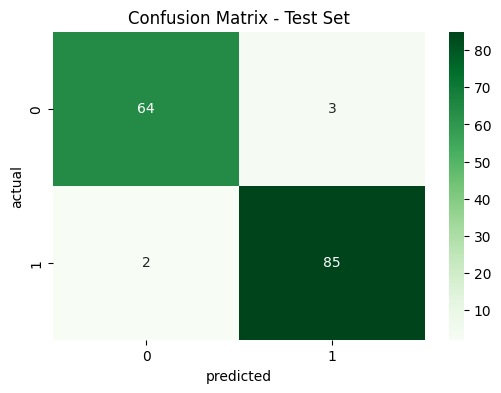

In [98]:
Confusion_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(Confusion_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

### Classification Report

In [99]:
print("The Report of Classification:")
print(classification_report(y_test, y_test_pred))

The Report of Classification:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.97      0.98      0.97        87

    accuracy                           0.97       154
   macro avg       0.97      0.97      0.97       154
weighted avg       0.97      0.97      0.97       154



### ROC Curve

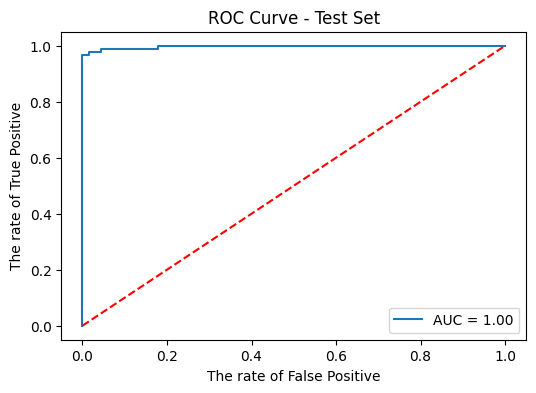

In [100]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {Roc_auc:.2f}')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('The rate of False Positive')
plt.ylabel('The rate of True Positive')
plt.title('ROC Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

##7. Conclusion
This project successfully developed an Artificial Neural Network (ANN) model with two hidden layers of 64 and 32 neurons, achieving strong predictive performance for heart disease classification. The model attained a validation accuracy of 96.10% and a test accuracy of 96.75%, alongside high precision (96.59%), recall (97.70%), F1-score (97.14%), and an outstanding ROC AUC of 0.9973. These results highlight the effectiveness of deep learning techniques combined with rigorous data preprocessing and model optimization in delivering reliable predictions on structured healthcare data. The findings underscore the potential of ANN models to support clinical decision-making in cardiovascular risk assessment.

**Key Insights:**

- Deep neural networks can perform competitively on medical tabular data, given the right preprocessing.
- Techniques such as early stopping and feature scaling significantly improve model performance and stability.
- Even relatively small datasets can yield valuable models when processed and handled carefully.

Overall, this solution has potential as a supportive tool for early diagnosis in healthcare, helping medical professionals make quicker and more accurate decisions, ultimately improving patient outcomes.


##8. Limitations and Future Work

**Limitations:**

- The neural network is a "black box," offering limited interpretability compared to decision trees or logistic regression.
- The dataset used is relatively small, increasing the risk of overfitting and limiting the ability to generalize to unseen populations.
- Real-world data may present different class imbalances or distributions than the dataset used here.
- Important clinical or lifestyle features (e.g., smoking, genetics, activity level) were not included.
- The model has only been trained and evaluated on a single dataset.

**Future Work:**

- Incorporate model explainability tools like SHAP or LIME to improve trust and transparency in predictions.
- Test the model on external datasets from different populations or hospitals to assess generalizability.
- Extend the feature set by including additional clinical, behavioral, or demographic data.
- Deploy the model as an API using frameworks like Flask or FastAPI for real-time predictions.
- Use hyperparameter optimization libraries such as Optuna or Keras Tuner for more efficient model tuning.
- Explore and compare performance with ensemble methods (e.g., XGBoost, Random Forest) for possible improvements.

This project serves as a strong foundation for building AI-powered clinical decision support systems, with clear paths for future enhancement and deployment.



# 8. Reference
Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download